In [1]:
install.packages('tidyverse')
library(tidyverse)

Installing package into 'C:/Users/Jini/Documents/R/win-library/3.6'
(as 'lib' is unspecified)



package 'tidyverse' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Jini\AppData\Local\Temp\Rtmp2RQORi\downloaded_packages


Warning message:
"package 'tidyverse' was built under R version 3.6.3"
-- Attaching packages ------------------------------------------------------------------------------- tidyverse 1.3.0 --

v ggplot2 3.2.1     v purrr   0.3.3
v tibble  2.1.3     v dplyr   1.0.4
v tidyr   1.0.0     v stringr 1.4.0
v readr   1.3.1     v forcats 0.5.0

Warning message:
"package 'readr' was built under R version 3.6.3"
Warning message:
"package 'dplyr' was built under R version 3.6.3"
Warning message:
"package 'forcats' was built under R version 3.6.3"
-- Conflicts ---------------------------------------------------------------------------------- tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()



In [2]:
setwd("C:/Users/Jini/Documents/GitHub/mekkattuparambil_DSP_S21/mekkattuparambil_DSP_S21/DataSciencePsychUZH-main/Homeworks")

1.1 Problem 1

In [3]:
iq_grade <-read.csv('data/iq_grade.csv')
iq_grade

subject_id,demographic_info,verbal_IQ,GPA
<int>,<fct>,<int>,<dbl>
101,"male, 23",105,3.9
102,"male, 19",121,3.2
103,"female, 27",123,3.4
104,"male, 21",97,2.8
105,"female, 21",93,2.9
106,"female, 25",135,3.8


The column "demographic_info" contains more than one information, respectively tow variables (sex, age). Wickham (2014) describes this problem as "multiple varibales stored in one column".

To make this dataset in tidy format I would split the column "demographic_info" into two columns, respectively into two variables: sex and age.

In [4]:
dat <- iq_grade %>%
separate(demographic_info, into=c('sex', 'age'), sep = ",")
head(dat)

,subject_id,sex,age,verbal_IQ,GPA
,<int>,<chr>,<chr>,<int>,<dbl>
1,101,male,23,105,3.9
2,102,male,19,121,3.2
3,103,female,27,123,3.4
4,104,male,21,97,2.8
5,105,female,21,93,2.9
6,106,female,25,135,3.8


1.2 Problem 2

In [5]:
suppressMessages(library(tidyverse))

data("USArrests")
USArrests <- select(USArrests, -UrbanPop)
head(USArrests)

,Murder,Assault,Rape
,<dbl>,<int>,<dbl>
Alabama,13.2,236,21.2
Alaska,10.0,263,44.5
Arizona,8.1,294,31.0
Arkansas,8.8,190,19.5
California,9.0,276,40.6
Colorado,7.9,204,38.7


According to Wichkham (2014) this is an example of the problem "column headers are values, not variable names". Because the columns headers: murder, assault and rape are values and not variable names. 

To make this dataset tidy, I would melt it, which means to turn the columns into rows. The columns: murder, assault and rape would be taken together under the variable "crime" and add another column for "frequency". 

In [6]:
rownames_to_column(USArrests, var = "US States") -> df
df

US States,Murder,Assault,Rape
<chr>,<dbl>,<int>,<dbl>
Alabama,13.2,236,21.2
Alaska,10.0,263,44.5
Arizona,8.1,294,31.0
Arkansas,8.8,190,19.5
California,9.0,276,40.6
Colorado,7.9,204,38.7
Connecticut,3.3,110,11.1
Delaware,5.9,238,15.8
Florida,15.4,335,31.9


In [22]:
dat <- df %>%
gather(key="Crime", value="Frequency", Murder, Assault, Rape)
head(dat)

,US States,Crime,Frequency
,<chr>,<chr>,<dbl>
1,Alabama,Murder,13.2
2,Alaska,Murder,10.0
3,Arizona,Murder,8.1
4,Arkansas,Murder,8.8
5,California,Murder,9.0
6,Colorado,Murder,7.9


1.3 Problem 3

In [8]:
setosa <- read.csv('data/setosa.csv')
virginica <- read.csv('data/virginica.csv')
versicolor <- read.csv('data/versicolor.csv')

head(setosa)
head(virginica)
head(versicolor)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
,<dbl>,<dbl>,<dbl>,<dbl>
1,5.1,3.5,1.4,0.2
2,4.9,3.0,1.4,0.2
3,4.7,3.2,1.3,0.2
4,4.6,3.1,1.5,0.2
5,5.0,3.6,1.4,0.2
6,5.4,3.9,1.7,0.4


,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
,<dbl>,<dbl>,<dbl>,<dbl>
1,6.3,3.3,6.0,2.5
2,5.8,2.7,5.1,1.9
3,7.1,3.0,5.9,2.1
4,6.3,2.9,5.6,1.8
5,6.5,3.0,5.8,2.2
6,7.6,3.0,6.6,2.1


,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
,<dbl>,<dbl>,<dbl>,<dbl>
1,7.0,3.2,4.7,1.4
2,6.4,3.2,4.5,1.5
3,6.9,3.1,4.9,1.5
4,5.5,2.3,4.0,1.3
5,6.5,2.8,4.6,1.5
6,5.7,2.8,4.5,1.3


This is an example of the problem "one type in multiple tables", where the same type of observations are stored in multiple files.

To make this datasets tidy, the three datasets can be merged into on single file, resp. combine them into a single table. 

In [10]:
bind_rows(setosa, virginica, versicolor, .id = "Species")
bind_rows("setosa" = 1, "virginica" = 2, "versicolor" = 3, .id = "Species")

Species,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
1,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
1,4.7,3.2,1.3,0.2
1,4.6,3.1,1.5,0.2
1,5.0,3.6,1.4,0.2
1,5.4,3.9,1.7,0.4
1,4.6,3.4,1.4,0.3
1,5.0,3.4,1.5,0.2
1,4.4,2.9,1.4,0.2


setosa,virginica,versicolor
<dbl>,<dbl>,<dbl>
1,2,3


2. Putting it all together

In [11]:
basel_weather_2018 <- read.csv('data/basel_weather_2018.csv')
basel_weather_2019 <- read.csv('data/basel_weather_2019.csv')
basel_weather_2020 <- read.csv('data/basel_weather_2020.csv')

In [12]:
head(basel_weather_2018)
head(basel_weather_2019)
head(basel_weather_2020)

,timestamp,temperature_type,temperature
,<fct>,<fct>,<dbl>
1,20180101T0000,temperature_mean,10.500529
2,20180101T0000,temperature_min,7.500529
3,20180101T0000,temperature_max,15.500529
4,20180101T0100,temperature_mean,9.790529
5,20180101T0100,temperature_min,5.790529
6,20180101T0100,temperature_max,13.790529


,timestamp,temperature_type,temperature
,<fct>,<fct>,<dbl>
1,20190101T0000,temperature_mean,5.0505285
2,20190101T0000,temperature_min,0.0505285
3,20190101T0000,temperature_max,9.0505285
4,20190101T0100,temperature_mean,4.9005284
5,20190101T0100,temperature_min,2.9005284
6,20190101T0100,temperature_max,8.9005284


,timestamp,temperature_type,temperature
,<fct>,<fct>,<dbl>
1,20200101T0000,temperature_mean,1.4905287
2,20200101T0000,temperature_min,0.4905287
3,20200101T0000,temperature_max,3.4905287
4,20200101T0100,temperature_mean,1.6905286
5,20200101T0100,temperature_min,0.6905286
6,20200101T0100,temperature_max,6.6905286


In [13]:
bind_rows(basel_weather_2018, basel_weather_2019, basel_weather_2020, .id = "years")
bind_rows("basel_weather_2018" = 1, "basel_weather_2019" = 2, "basel_weather_2020" = 3, .id = years)

years,timestamp,temperature_type,temperature
<chr>,<fct>,<fct>,<dbl>
1,20180101T0000,temperature_mean,10.500529
1,20180101T0000,temperature_min,7.500529
1,20180101T0000,temperature_max,15.500529
1,20180101T0100,temperature_mean,9.790529
1,20180101T0100,temperature_min,5.790529
1,20180101T0100,temperature_max,13.790529
1,20180101T0200,temperature_mean,8.970529
1,20180101T0200,temperature_min,6.970529
1,20180101T0200,temperature_max,9.970529


basel_weather_2018,basel_weather_2019,basel_weather_2020
<dbl>,<dbl>,<dbl>
1,2,3


In [14]:
data <-bind_rows(basel_weather_2018, basel_weather_2019, basel_weather_2020, .id = "years")
data <- data %>%
spread(temperature_type,temperature)
head(data)
bind_rows("basel_weather_2018" = 1, "basel_weather_2019" = 2, "basel_weather_2020" = 3, .id = years)

,years,timestamp,temperature_max,temperature_mean,temperature_min
,<chr>,<fct>,<dbl>,<dbl>,<dbl>
1,1,20180101T0000,15.500529,10.500529,7.500529
2,1,20180101T0100,13.790529,9.790529,5.790529
3,1,20180101T0200,9.970529,8.970529,6.970529
4,1,20180101T0300,11.690529,8.690529,5.690529
5,1,20180101T0400,11.960528,7.960528,6.960528
6,1,20180101T0500,9.360528,7.360529,3.360529


basel_weather_2018,basel_weather_2019,basel_weather_2020
<dbl>,<dbl>,<dbl>
1,2,3


In [15]:
data <- mutate(data, year = substr(data$timestamp, 1, 4))
data <- mutate(data, month = substr(data$timestamp, 5, 6))
data <- mutate(data, day = substr(data$timestamp, 7, 8))
data <- mutate(data, hour = substr(data$timestamp, 10, 13))
head(data)

,years,timestamp,temperature_max,temperature_mean,temperature_min,year,month,day,hour
,<chr>,<fct>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>
1,1,20180101T0000,15.500529,10.500529,7.500529,2018,01,01,0000
2,1,20180101T0100,13.790529,9.790529,5.790529,2018,01,01,0100
3,1,20180101T0200,9.970529,8.970529,6.970529,2018,01,01,0200
4,1,20180101T0300,11.690529,8.690529,5.690529,2018,01,01,0300
5,1,20180101T0400,11.960528,7.960528,6.960528,2018,01,01,0400
6,1,20180101T0500,9.360528,7.360529,3.360529,2018,01,01,0500


In [16]:
monthly_temp <- data %>%
group_by(month) %>%
summarise(max_temperature = mean(temperature_max)) %>%
print()

# A tibble: 12 x 2
   month max_temperature
 * <chr>           <dbl>
 1 01               7.89
 2 02               8.28
 3 03              10.9 
 4 04              16.5 
 5 05              18.2 
 6 06              22.9 
 7 07              25.2 
 8 08              25.1 
 9 09              21.2 
10 10              16.3 
11 11              11.3 
12 12               8.68


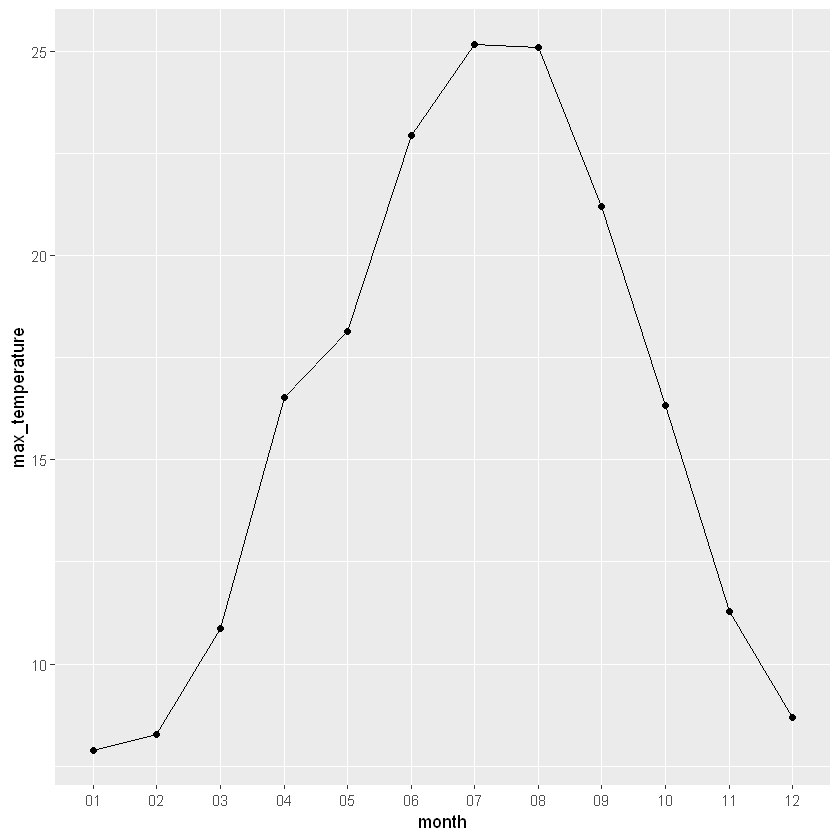

In [17]:
ggplot(monthly_temp, aes(month, max_temperature, group = 1)) + 
geom_point() +
geom_line()

In [18]:
hourly_temp <- data %>%
group_by(hour) %>%
summarise(mean_temperature = mean(temperature_mean)) %>%
print()

# A tibble: 24 x 2
   hour  mean_temperature
 * <chr>            <dbl>
 1 0000             11.3 
 2 0100             10.9 
 3 0200             10.5 
 4 0300             10.1 
 5 0400              9.81
 6 0500              9.56
 7 0600              9.51
 8 0700              9.85
 9 0800             10.7 
10 0900             11.9 
# ... with 14 more rows


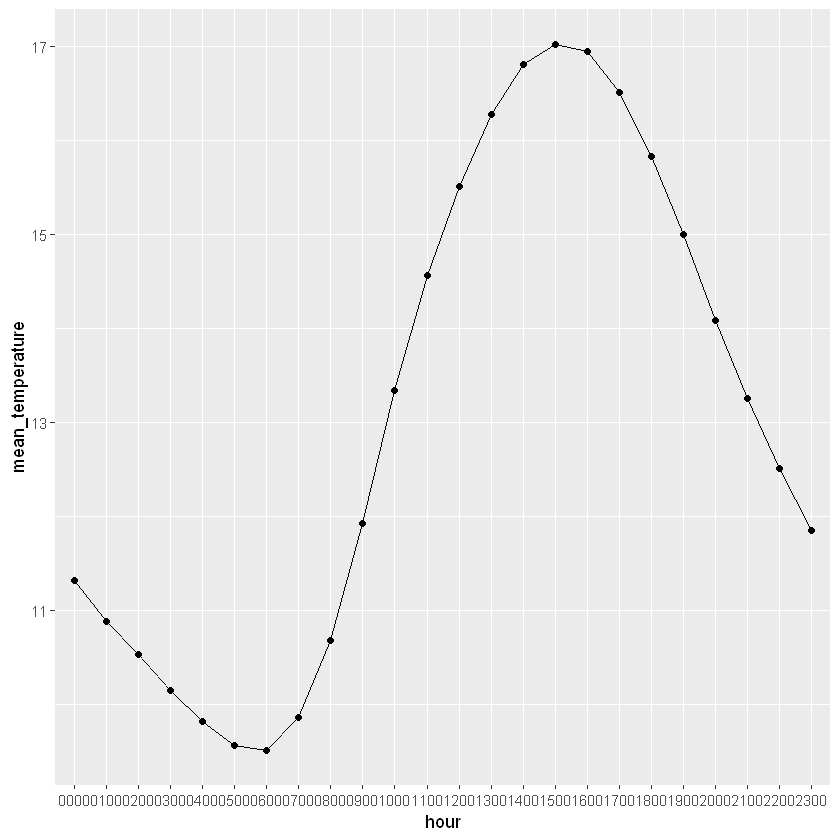

In [25]:
ggplot(hourly_temp, aes(hour, mean_temperature, group = 1)) + 
geom_point() +
geom_line() 